<a href="https://colab.research.google.com/github/kavehkarimadini/ARC_101_Machine_Learning/blob/main/Logistic_Regression_GA_NM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Great! Let's start with the **basics of logistic regression** and gradually move towards implementing **maximum likelihood estimation (MLE) using gradient ascent**.

---

## **Step 1: Understanding Logistic Regression**
Logistic regression is used for **binary classification** problems, where the output \( Y \) can take two possible values:  
$
Y \in \{0,1\}
$
Unlike linear regression, where we predict a continuous output, in logistic regression, we predict the **probability** that an input \( X \) belongs to a certain class.

We use the **sigmoid function** to transform linear regression output into a probability:

$
h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
$

where:
- $ h_\theta(x) $ is the predicted probability of \( Y=1 \),
- $ \theta $ is the parameter vector,
- \( x \) is the feature vector,
- $ \sigma(z) $ is the sigmoid function.

---

## **Step 2: Likelihood Function**
To estimate the best $ \theta $, we use **Maximum Likelihood Estimation (MLE)**.

The likelihood function represents the probability of observing the given data:

$
L(\theta) = \prod_{i=1}^{m} P(y^{(i)} | x^{(i)}; \theta)
$

Since logistic regression predicts probabilities using $ h_\theta(x) $, we define:

$
P(y^{(i)} | x^{(i)}; \theta) = h_\theta(x^{(i)})^{y^{(i)}} (1 - h_\theta(x^{(i)}))^{(1 - y^{(i)})}
$

Thus, the likelihood function is:

$
L(\theta) = \prod_{i=1}^{m} h_\theta(x^{(i)})^{y^{(i)}} (1 - h_\theta(x^{(i)}))^{(1 - y^{(i)})}
$

---

## **Step 3: Log-Likelihood Function**
Since the likelihood involves a **product** of probabilities, it’s easier to work with the **log-likelihood**, which converts the product into a sum:

$
\ell(\theta) = \sum_{i=1}^{m} \left[ y^{(i)} \log h_\theta(x^{(i)}) + (1 - y^{(i)}) \log (1 - h_\theta(x^{(i)})) \right]
$

Our goal is to **maximize** this log-likelihood function.

---

## **Step 4: Finding the Maximum Log-Likelihood with Gradient Ascent**
To find the best $ \theta $, we take the derivative (gradient) of the log-likelihood:

$
\frac{\partial \ell(\theta)}{\partial \theta} = \sum_{i=1}^{m} (y^{(i)} - h_\theta(x^{(i)})) x^{(i)}
$

To maximize $ \ell(\theta) $, we update $ \theta $ using **gradient ascent**:

$
\theta := \theta + \alpha \sum_{i=1}^{m} (y^{(i)} - h_\theta(x^{(i)})) x^{(i)}
$

where $ \alpha $ is the learning rate.

---

Iteration 0: Log-likelihood = -3.203143423415827
Iteration 100: Log-likelihood = -2.3354297812649323
Final theta: [2.18713936e-16 3.44373354e+00]


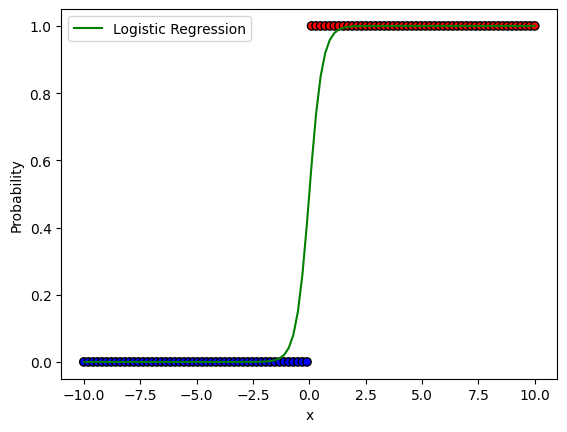

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
x = np.linspace(-10, 10, 100)
y = (x > 0).astype(int)  # Labels: 1 if x > 0, else 0
x = x.reshape(-1, 1)  # Reshape to column vector

# Add bias term
X = np.hstack((np.ones((x.shape[0], 1)), x))

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log-likelihood function
def log_likelihood(X, y, theta):
    h = sigmoid(X @ theta)
    return np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
# def log_likelihood(X, y, theta, epsilon=1e-9):
#     h = sigmoid(X @ theta)
#     return np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

# Gradient ascent
def gradient_ascent(X, y, lr=0.01, iterations=101):
    theta = np.zeros((X.shape[1], 1))
    m = X.shape[0]
    y = y.reshape(-1, 1)

    for i in range(iterations):
        gradient = X.T @ (y - sigmoid(X @ theta))
        theta += lr * gradient

        if i % 100 == 0:
            print(f"Iteration {i}: Log-likelihood = {log_likelihood(X, y, theta)}")

    return theta

# Train logistic regression model
theta = gradient_ascent(X, y)
print(f"Final theta: {theta.ravel()}")

# Plot decision boundary
plt.scatter(x, y, c=y, cmap='bwr', edgecolor='k')
x_vals = np.linspace(-10, 10, 100)
y_vals = sigmoid(theta[0] + theta[1] * x_vals)
plt.plot(x_vals, y_vals, 'g', label='Logistic Regression')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.show()

## **hands-on example using only mathematics** to maximize the likelihood of the logistic function using **Newton’s Method**.

---

## **Step 1: Define the Logistic Regression Model**
We use the **sigmoid function** as the probability model:

$
h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
$

where:
- \( x \) is the input feature vector,
- $ \theta $ is the parameter vector.

For a **binary classification problem** where $ y \in \{0,1\} $, the probability of an outcome is:

$
P(y | x; \theta) = h_\theta(x)^y (1 - h_\theta(x))^{(1 - y)}
$

---

## **Step 2: Log-Likelihood Function**
The **log-likelihood function** for \( m \) training examples is:

$
\ell(\theta) = \sum_{i=1}^{m} \left[ y^{(i)} \log h_\theta(x^{(i)}) + (1 - y^{(i)}) \log (1 - h_\theta(x^{(i)})) \right]
$

Our goal is to **maximize** $ \ell(\theta) $.

---

## **Step 3: Compute the First Derivative (Gradient)**
The gradient (first derivative) of the log-likelihood with respect to $ \theta $ is:

$
\nabla \ell(\theta) = \sum_{i=1}^{m} x^{(i)} \left( y^{(i)} - h_\theta(x^{(i)}) \right)
$

or in matrix form:

$
\nabla \ell(\theta) = X^T (y - h)
$

where:
- \( X \) is the $ m \times (n+1) $ matrix of feature values (including a bias column),
- \( y \) is the $ m \times 1 $ vector of true labels,
- \( h \) is the $ m \times 1 $ vector of predicted probabilities.

---

## **Step 4: Compute the Second Derivative (Hessian)**
The Hessian matrix (second derivative of log-likelihood) is:

$
H = -X^T R X
$

where:
- \( R \) is a **diagonal matrix** of size $ m \times m $ with entries:

  $
  R_{ii} = h_i (1 - h_i)
  $

  So,

  $
  R = \text{diag}(h_1 (1 - h_1), h_2 (1 - h_2), ..., h_m (1 - h_m))
  $

---

## **Step 5: Newton’s Method Update Rule**
Newton's method updates $ \theta $ iteratively using:

$
\theta^{(t+1)} = \theta^{(t)} - H^{-1} \nabla \ell(\theta)
$

Expanding:

$
\theta^{(t+1)} = \theta^{(t)} - (-X^T R X)^{-1} X^T (y - h)
$

which simplifies to:

$
\theta^{(t+1)} = \theta^{(t)} + (X^T R X)^{-1} X^T (y - h)
$

---

## **Step 6: Example Calculation**
Let’s assume we have **three data points** with a single feature \( x \):

| \( x \) | \( y \) |
|--------|------|
| 1      | 0    |
| 2      | 1    |
| 3      | 1    |

### **1. Define Feature Matrix \( X \)**
We include a bias term (column of ones):

$
X =
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3
\end{bmatrix}
$

### **2. Initialize $ \theta $**
Let’s assume initial $ \theta = [0, 0]^T $.

### **3. Compute $ h = \sigma(X\theta) $**
Since $ \theta^T X = [0, 0] $, we get:

$
h = \sigma(0) = 0.5
$

for all three points.

$
h =
\begin{bmatrix}
0.5 \\
0.5 \\
0.5
\end{bmatrix}
$

### **4. Compute Gradient $ \nabla \ell(\theta) $**
$
\nabla \ell(\theta) = X^T (y - h)
$

$
=
\begin{bmatrix}
1 & 1 & 1 \\
1 & 2 & 3
\end{bmatrix}
\begin{bmatrix}
0 - 0.5 \\
1 - 0.5 \\
1 - 0.5
\end{bmatrix}
$

$
=
\begin{bmatrix}
1(-0.5) + 1(0.5) + 1(0.5) \\
1(-0.5) + 2(0.5) + 3(0.5)
\end{bmatrix}
=
\begin{bmatrix}
0.5 \\
1.5
\end{bmatrix}
$

### **5. Compute Hessian Matrix \( H \)**
$
R = \text{diag}(h_1(1 - h_1), h_2(1 - h_2), h_3(1 - h_3))
$

$
=
\text{diag}(0.5(1 - 0.5), 0.5(1 - 0.5), 0.5(1 - 0.5))
=
\text{diag}(0.25, 0.25, 0.25)
$

$
H = X^T R X
$

$
=
\begin{bmatrix}
1 & 1 & 1 \\
1 & 2 & 3
\end{bmatrix}
\begin{bmatrix}
0.25 & 0 & 0 \\
0 & 0.25 & 0 \\
0 & 0 & 0.25
\end{bmatrix}
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3
\end{bmatrix}
$

$
=
\begin{bmatrix}
0.25 + 0.25 + 0.25 & 0.25(1) + 0.25(2) + 0.25(3) \\
0.25(1) + 0.25(2) + 0.25(3) & 0.25(1^2) + 0.25(2^2) + 0.25(3^2)
\end{bmatrix}
$

$
=
\begin{bmatrix}
0.75 & 1.5 \\
1.5 & 3.5
\end{bmatrix}
$

### **6. Compute Update for $ \theta $**
$
\theta^{(t+1)} = \theta^{(t)} + H^{-1} \nabla \ell(\theta)
$

First, compute $ H^{-1} $:

$
H^{-1} =
\frac{1}{(0.75)(3.5) - (1.5)^2}
\begin{bmatrix}
3.5 & -1.5 \\
-1.5 & 0.75
\end{bmatrix}
$

$
=
\frac{1}{0.375}
\begin{bmatrix}
3.5 & -1.5 \\
-1.5 & 0.75
\end{bmatrix}
=
\begin{bmatrix}
9.33 & -4 \\
-4 & 2
\end{bmatrix}
$

Now,

$
\theta^{(t+1)} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} +
\begin{bmatrix} 9.33 & -4 \\ -4 & 2 \end{bmatrix}
\begin{bmatrix} 0.5 \\ 1.5 \end{bmatrix}
$

$
= \begin{bmatrix} (9.33)(0.5) + (-4)(1.5) \\ (-4)(0.5) + (2)(1.5) \end{bmatrix}
= \begin{bmatrix} 0.165 \\ 1 \end{bmatrix}
$

This process continues iteratively until convergence.

Iteration 0: Log-likelihood = -175.78685103144144
Iteration 1: Log-likelihood = -856.1325686914411
Iteration 2: Log-likelihood = -2061.064386638194
Iteration 3: Log-likelihood = -2072.3265836946407
Iteration 4: Log-likelihood = -2072.3265836946407
Iteration 5: Log-likelihood = -2072.3265836946407
Iteration 6: Log-likelihood = -2072.3265836946407
Iteration 7: Log-likelihood = -2072.3265836946407
Iteration 8: Log-likelihood = -2072.3265836946407
Iteration 9: Log-likelihood = -2072.3265836946407
Final theta: [-7.63886654e-05 -6.06234524e+08]


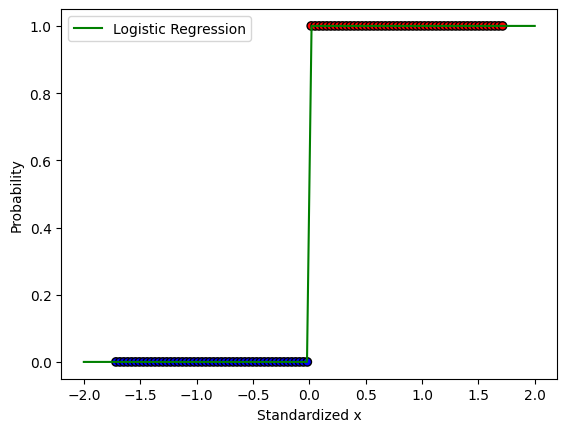

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
x = np.linspace(-10, 10, 100)
y = (x >= 0).astype(int)  # Labels: 1 if x > 0, else 0
x = x.reshape(-1, 1)  # Reshape to column vector

# Standardizing x for numerical stability
x_mean, x_std = np.mean(x), np.std(x)
x = (x - x_mean) / x_std  # Standardization

# Add bias term
X = np.hstack((np.ones((x.shape[0], 1)), x))

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Prevent overflow

# Log-likelihood function
def log_likelihood(X, y, theta, epsilon=1e-9):
    h = sigmoid(X @ theta)
    return np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

# Newton's Method for Logistic Regression with Regularization
def newtons_method(X, y, iterations=10, reg_lambda=1e-6):
    theta = np.zeros((X.shape[1], 1))
    m = X.shape[0]
    y = y.reshape(-1, 1)

    for i in range(iterations):
        h = sigmoid(X @ theta)
        gradient = X.T @ (y - h)
        R = np.diag((h * (1 - h)).flatten())
        Hessian = X.T @ R @ X + reg_lambda * np.eye(X.shape[1])  # Regularized Hessian

        try:
            theta -= np.linalg.inv(Hessian) @ gradient
        except np.linalg.LinAlgError:
            print("Hessian is singular, stopping iteration.")
            break

        print(f"Iteration {i}: Log-likelihood = {log_likelihood(X, y, theta)}")

    return theta

# Train logistic regression model with Newton's Method
theta = newtons_method(X, y)
print(f"Final theta: {theta.ravel()}")
if theta[1] < 0:
    theta *= -1  # Flip theta to correct orientation
# Plot decision boundary
plt.scatter(x, y, c=y, cmap='bwr', edgecolor='k')
x_vals = np.linspace(-2, 2, 100)  # Adjusted for standardized range
y_vals = sigmoid(theta[0] + theta[1] * x_vals)
plt.plot(x_vals, y_vals, 'g', label='Logistic Regression')
plt.xlabel('Standardized x')
plt.ylabel('Probability')
plt.legend()
plt.show()


In **Scikit-Learn**, the `LogisticRegression` class uses an optimization solver to find the **maximum likelihood estimate (MLE)** for the logistic regression parameters $ \theta $. The solver used depends on the configuration:

### **Solvers Used in Scikit-Learn's Logistic Regression**
The `solver` parameter in `sklearn.linear_model.LogisticRegression` determines which optimization algorithm is used:

| **Solver**    | **Algorithm Used** | **Handles L1 Regularization?** | **Handles L2 Regularization?** | **Best for Large Datasets?** |
|--------------|-------------------|------------------------------|------------------------------|---------------------------|
| **'lbfgs'** (default) | **Quasi-Newton (BFGS with Approximate Hessian)** | ❌ No | ✅ Yes | ✅ Yes |
| **'newton-cg'** | **Newton's Conjugate Gradient** | ❌ No | ✅ Yes | ✅ Yes |
| **'liblinear'** | **Coordinate Descent (Good for Small Datasets)** | ✅ Yes | ✅ Yes | ❌ No |
| **'sag'** | **Stochastic Average Gradient Descent** | ❌ No | ✅ Yes | ✅ Best for Large Datasets |
| **'saga'** | **Variant of SAG with L1 Support** | ✅ Yes | ✅ Yes | ✅ Best for Large Sparse Datasets |

---

### **What is the Default Solver in Scikit-Learn?**
- **`solver='lbfgs'`** is the default solver. It uses **L-BFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno algorithm)**, a quasi-Newton method that approximates the Hessian using past gradients.
- It is robust, efficient, and works well for **most problems**.
- It does **not** support L1 regularization.

---

### **Does Scikit-Learn Use Gradient Descent?**
- **No, it does not use standard gradient descent** (`SGD` or `Batch Gradient Descent`) by default.
- Instead, it uses **Newton’s Method (or a variant like L-BFGS or Conjugate Gradient), which converges faster**.

---

### **Which Solver Should You Use?**
1. **For small datasets** → `liblinear` (or `newton-cg`).
2. **For large datasets** → `sag` or `saga` (stochastic optimizers).
3. **For L1 regularization** (sparse models) → `liblinear` or `saga`.
4. **Default (most cases)** → `lbfgs`.

---

### **Example: Using Different Solvers in Scikit-Learn**
```python
from sklearn.linear_model import LogisticRegression

# Using default solver (lbfgs)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
```

You can change the solver:
```python
model = LogisticRegression(solver='newton-cg', max_iter=1000)
```

---

### **Summary**
- Scikit-Learn **does not** use simple gradient descent.
- It uses **Newton’s Method-based solvers** (e.g., `lbfgs`, `newton-cg`).
- For **large datasets**, stochastic solvers like `sag` and `saga` are better.
- The **default solver (`lbfgs`) is usually the best choice**.

Dataset Shape: (569, 30), Labels: {0, 1}
Accuracy: 0.9737
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



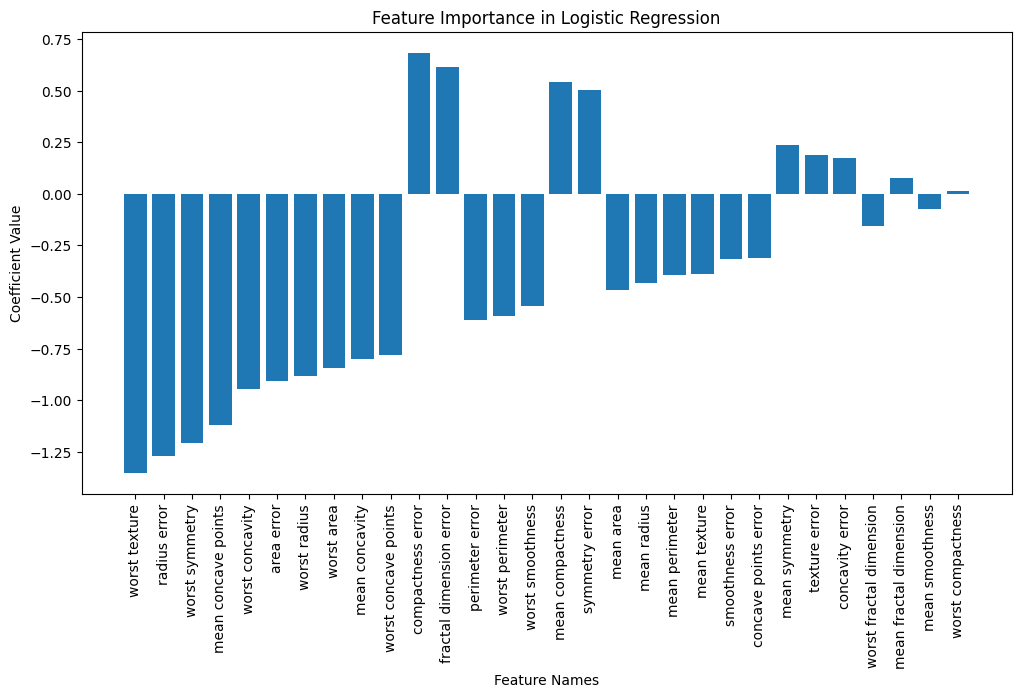

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1️⃣ Load Predefined Dataset (Breast Cancer)
data = load_breast_cancer()
X, y = data.data, data.target  # Features and labels
print(f"Dataset Shape: {X.shape}, Labels: {set(y)}")

# 2️⃣ Split Dataset into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Standardize Features (Important for Optimization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Train Logistic Regression Model
model = LogisticRegression(solver='lbfgs', max_iter=1000)  # Default solver
model.fit(X_train, y_train)

# 5️⃣ Make Predictions
y_pred = model.predict(X_test)

# 6️⃣ Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7️⃣ Visualizing Feature Importance (Weights)
coefficients = model.coef_[0]
features = data.feature_names
sorted_indices = np.argsort(np.abs(coefficients))[::-1]  # Sort by absolute magnitude

plt.figure(figsize=(12, 6))
plt.bar(range(len(features)), coefficients[sorted_indices], align='center')
plt.xticks(range(len(features)), np.array(features)[sorted_indices], rotation=90)
plt.xlabel("Feature Names")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Logistic Regression")
plt.show()